In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Tabelle erstellen und Daten importieren

In [13]:
md1 = pd.read_csv('tables/mess1.csv')
# print(md1.to_latex(index = False, column_format= "c c c c", decimal=',')) 

md2 = pd.read_csv('tables/mess2.csv')
# print(md2.to_latex(index = False, column_format= "c c c c", decimal=','))


md1 = pd.DataFrame(md1).to_numpy()
md2 = pd.DataFrame(md2).to_numpy()

alpha1 = np.append(md1[:-2,0], md1[:,2]) * np.pi / 180
Isenk = np.append(md1[:-2,1],md1[:,3])

alpha2 = np.append(md2[:-2,0], md2[:,2]) * np.pi / 180
Ipar = np.append(md2[:-2,1],md2[:,3])

Daten auswerten:

Berechnung des Brechungsindex

In [14]:
def func(I):            # Berechnung von (gemessener Strom) / (Referenzstrom)
    return (I / 0.167)

werte1 = func(md1[:-2,1])
werte2 = func(md1[:,3])

# werteprint = pd.DataFrame(werte1, columns = ['Column_A'])
# print(werteprint.to_latex(index = False, column_format= "c", decimal=',')) 

In [15]:
def func2(E, alpha):
    return (np.sqrt(1 + (4 * E * (np.cos(alpha))**2) / (E - 1)**2))

n1 = func2(werte1, md1[:-2,0] * np.pi / 180)
n2 = func2(werte2, md1[:,2] * np.pi / 180)
n_s = np.append(n1,n2)

nmittel = np.mean(n_s[:])
nstd = np.std(n_s[:])
print('Der Mittelwert für n beträgt: ' +  str(nmittel) + ' ± ' + str(nstd))

#prin = pd.DataFrame(n_s, columns = ['Column_A'])
#print(prin.to_latex(index = False, column_format= "c", decimal=','))

Der Mittelwert für n beträgt: 4.776290067736398 ± 8.888084422378968


Tabelle 2 berechnen

In [16]:
werte1 = func(md1[:-2,1])
werte2 = func(md1[:,3])

# werteprint = pd.DataFrame(werte1, columns = ['Column_A'])
# print(werteprint.to_latex(index = False, column_format= "c", decimal=',')) 

In [17]:
def func2(Er, Ee, alpha):
    summand1 = (Er + Ee) / ((Er - Ee) * np.cos(alpha))
    summand2 = (Er + Ee) / (Er - Ee)
    return np.sqrt(0.5 * summand1**2 + np.sqrt(0.25 * summand1**4 - summand2**2 * (np.tan(alpha))**2))

print(func2(1, 60, 15 * np.pi / 180))

1.0364604739221577


In [23]:
def func2(Er, Ee, alpha):
    summand1 = (Er + Ee) / ((Er - Ee) * np.cos(alpha))
    summand2 = (Er + Ee) / (Er - Ee)
    return np.sqrt(0.5 * summand1**2 + np.sqrt(0.25 * summand1**4 - summand2**2 * (np.tan(alpha))**2))

I_0 = 160 * 1e-6
E_0 = np.sqrt(I_0)
n_p = func2(E_0, np.sqrt(Ipar * 10**-6), alpha2 * np.pi / 180)

nmittel = np.mean(n_p[:])
nstd = np.std(n_p[:])
print('Der Mittelwert für n beträgt: ' +  str(nmittel) + ' ± ' + str(nstd))

# prin = pd.DataFrame(n_p, columns = ['Column_A'])
# print(prin.to_latex(index = False, column_format= "c", decimal=','))

Der Mittelwert für n beträgt: 3.206026165960106 ± 1.3686279483093367


Plot erstellen:

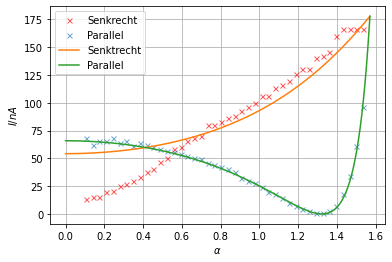

In [93]:
plt.plot(alpha1, Isenk * 10**3, 'xr', markersize=5 , label = 'Senkrecht', alpha=0.65)
plt.plot(alpha2, Ipar, 'x', markersize=5 , label = 'Parallel', alpha=0.65)

nmittel = 3.465

def Esenk(x):
    return ((np.sqrt(nmittel**2-(np.sin(x))**2)-np.cos(x))**4)/(nmittel**2-1)**2
def Epar(x):
    return ((nmittel**2*np.cos(x)-np.sqrt(nmittel**2-np.sqrt(nmittel**2-(np.sin(x)**2))))/((nmittel**2*np.cos(x)+np.sqrt(nmittel**2-np.sqrt(nmittel**2-(np.sin(x)**2))))))**2
x = np.linspace(0,np.pi/2,1000)
plt.plot(x, Esenk(x) * 10**2.25,label = 'Senktrecht')
plt.plot(x, Epar(x) * 10**2.25,label = 'Parallel')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$I / nA$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style

In [104]:
# RECHNER

ns1 = ufloat(3.21, 1.37)
ns2 = ufloat(3.73, 0.1)
n = (ns1 + ns2) / 2
print(n)

3.5+/-0.7
